In [1]:
import pyramid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#IMPORTANT : import the DataPreprocessing class
from DataPreprocessing import DataPreprocessing

/home/assiene/anaconda3/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


In [2]:
#names=["DFIndex", "StationIndex", "StationName", "Year", "Month", "Day", "Rainfall"]
clustered_data = pd.read_csv("clustered_data/cluster_1.csv")
clustered_data.sort_values(["Year", "Month", "Day"], inplace=True)

In [3]:
clustered_data

,Unnamed: 0,StationIndex,Station,Year,Month,Day,Rainfall
0,0,1,Dhaka,1999,1,1,0
6696,0,1,Dhaka,1999,1,1,0
13392,372,2,Tangail,1999,1,1,0
20088,744,3,Mymensingh,1999,1,1,0
26784,1116,4,Faridpur,1999,1,1,0
33480,1488,5,Madaripur,1999,1,1,0
40176,1860,6,Srimangal,1999,1,1,0
46872,3348,10,Ishurdi,1999,1,1,0
53568,3720,11,Rajshahi,1999,1,1,0
60264,4836,14,chuadanga,1999,1,1,0


In [4]:
#pd.to_datetime(clustered_data[["Year", "Day", "Month"]], yearfirst=True)
clustered_data.reset_index(inplace=True)
clustered_data["Date"] = clustered_data["Day"].map(str) + "/" + clustered_data["Month"].map(str) + "/" + clustered_data["Year"].map(str)
clustered_data.index = pd.to_datetime(clustered_data["Date"], format="%d/%m/%Y", errors="ignore")
clustered_data

,index,Unnamed: 0,StationIndex,Station,Year,Month,Day,Rainfall,Date
Date,,,,,,,,,
1/1/1999,0,0,1,Dhaka,1999,1,1,0,1/1/1999
1/1/1999,6696,0,1,Dhaka,1999,1,1,0,1/1/1999
1/1/1999,13392,372,2,Tangail,1999,1,1,0,1/1/1999
1/1/1999,20088,744,3,Mymensingh,1999,1,1,0,1/1/1999
1/1/1999,26784,1116,4,Faridpur,1999,1,1,0,1/1/1999
1/1/1999,33480,1488,5,Madaripur,1999,1,1,0,1/1/1999
1/1/1999,40176,1860,6,Srimangal,1999,1,1,0,1/1/1999
1/1/1999,46872,3348,10,Ishurdi,1999,1,1,0,1/1/1999
1/1/1999,53568,3720,11,Rajshahi,1999,1,1,0,1/1/1999


In [5]:
DP = DataPreprocessing()
time_series_df = clustered_data[["Rainfall"]]
time_series_df

,Rainfall
Date,
1/1/1999,0
1/1/1999,0
1/1/1999,0
1/1/1999,0
1/1/1999,0
1/1/1999,0
1/1/1999,0
1/1/1999,0
1/1/1999,0


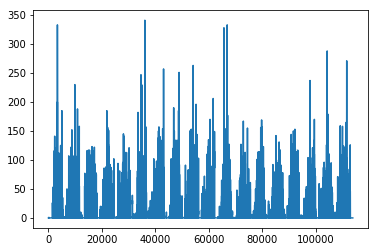

In [6]:
plt.plot(np.arange(len(time_series_df)), time_series_df)

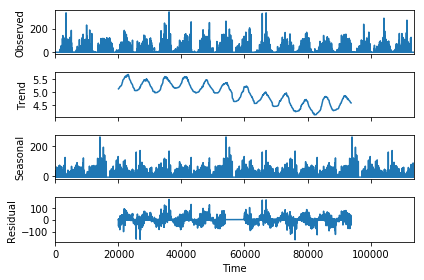

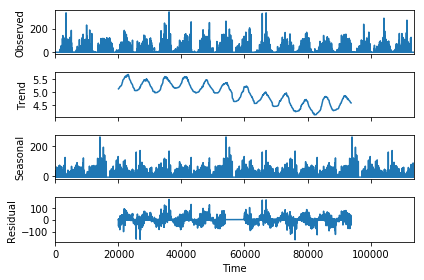

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(time_series_df.values, model="additive", freq = 40000)
result.plot()

In [11]:
from pyramid.arima import auto_arima

time_series_df = clustered_data[clustered_data["Year"] >= 2014]
time_series_df = time_series_df[["Rainfall"]]
time_series_df

,Rainfall
Date,
1/1/2014,0
1/1/2014,0
1/1/2014,0
1/1/2014,0
1/1/2014,0
1/1/2014,0
1/1/2014,0
1/1/2014,0
1/1/2014,0


In [12]:
stepwise_model = auto_arima(time_series_df, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=147396.772, BIC=147436.023, Fit time=88.832 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=168956.151, BIC=168971.851, Fit time=0.815 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=159708.279, BIC=159739.679, Fit time=11.085 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=147655.039, BIC=147686.439, Fit time=69.309 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=147550.420, BIC=147597.520, Fit time=91.504 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=159630.817, BIC=159662.217, Fit time=20.286 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=147543.193, BIC=147590.293, Fit time=252.769 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=147930.602, BIC=147985.553, Fit time=193.853 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=148014.809, BIC=148061.909, Fit ti

In [54]:
df_test = clustered_data[(clustered_data["Year"] >= 2014)]
df_test = clustered_data[clustered_data["Station"] == "Dhaka"]
time_series_df_test = df_test[["Rainfall"]]
time_series_df_test

,Rainfall
Date,
1/1/1999,0
1/1/1999,0
2/1/1999,0
2/1/1999,0
3/1/1999,0
3/1/1999,0
4/1/1999,0
4/1/1999,0
5/1/1999,0


In [58]:
train_df = time_series_df_test[df_test["Year"] < 2016]
test_df = time_series_df_test[df_test["Year"] >= 2016]

In [59]:
stepwise_model.fit(train_df["Rainfall"])

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [60]:
y_pred = stepwise_model.predict(len(test_df))

In [67]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_df["Rainfall"], -y_pred))

In [68]:
rmse

9.772953550232408

In [69]:
-y_pred

array([ 2.27222149e-01,  2.96771514e-01, -6.75503763e-03, -1.83407030e-03,
        5.60383004e-01,  5.65303377e-01, -1.12725209e+00, -1.12233172e+00,
        4.02459479e-01,  4.07379843e-01,  5.34362945e-01,  5.39222577e-01,
        3.52693887e-01,  3.57700156e-01,  5.39875419e-02,  5.89178223e-02,
        6.21144803e-01,  6.26075084e-01, -1.06647047e+00, -1.06154019e+00,
        4.63260910e-01,  4.68191182e-01,  5.95184192e-01,  6.00053732e-01,
        4.13534950e-01,  4.18551127e-01,  1.14848421e-01,  1.19788609e-01,
        6.82025498e-01,  6.86965687e-01, -1.00556996e+00, -1.00062977e+00,
        5.24181237e-01,  5.29121417e-01,  6.56124336e-01,  6.61003783e-01,
        4.74494909e-01,  4.79520994e-01,  1.75828196e-01,  1.80778293e-01,
        7.43025090e-01,  7.47975187e-01, -9.44550556e-01, -9.39600459e-01,
        5.85220460e-01,  5.90170549e-01,  7.17183375e-01,  7.22072730e-01,
        5.35573764e-01,  5.40609758e-01,  2.36926868e-01,  2.41886872e-01,
        8.04143577e-01,  

(array([630.,  44.,  26.,  18.,  12.,   0.,   6.,   6.,   0.,   2.]),
 array([-4.48995766,  3.25045504, 10.99086773, 18.73128043, 26.47169313,
        34.21210582, 41.95251852, 49.69293121, 57.43334391, 65.1737566 ,
        72.9141693 ]),
 <a list of 10 Patch objects>)

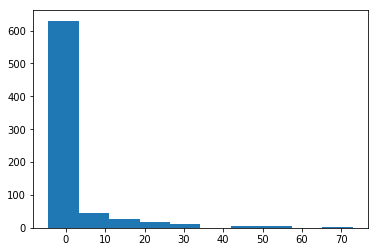

In [70]:
plt.hist(test_df["Rainfall"]+y_pred)

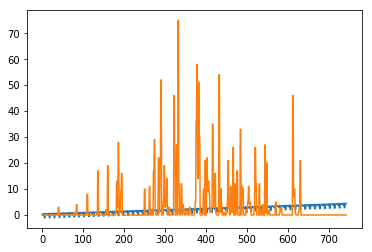

In [74]:
xtime = np.arange(len(y_pred))
plt.plot(xtime, -y_pred)
plt.plot(xtime, test_df["Rainfall"])
plt.savefig("models/ARIMA/Arima_pred.svg", format="svg")
#plt.savefig("models/ARIMA/Arima_pred.png")
plt.show()

In [82]:
from sklearn.metrics import r2_score, explained_variance_score

r2 = r2_score(test_df["Rainfall"], -y_pred)
ev = explained_variance_score(test_df["Rainfall"], -y_pred)

print("R2 : ", r2, " - EV : ", ev)

R2 :  -0.034702339333048116  - EV :  -0.005863647556429541


In [34]:
stepwise_model2 = auto_arima(time_series_df["Rainfall"], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model2.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=147396.772, BIC=147436.023, Fit time=77.274 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=168956.151, BIC=168971.851, Fit time=2.353 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=159708.279, BIC=159739.679, Fit time=11.136 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=147655.039, BIC=147686.439, Fit time=73.738 seconds


KeyboardInterrupt: 

In [35]:
times_series_df

,index,Unnamed: 0,StationIndex,Station,Year,Month,Day,Rainfall,Date
Date,,,,,,,,,
1/1/2014,5580,193440,1,Dhaka,2014,1,1,0,1/1/2014
1/1/2014,12276,193440,1,Dhaka,2014,1,1,0,1/1/2014
1/1/2014,18972,193812,2,Tangail,2014,1,1,0,1/1/2014
1/1/2014,25668,194184,3,Mymensingh,2014,1,1,0,1/1/2014
1/1/2014,32364,194556,4,Faridpur,2014,1,1,0,1/1/2014
1/1/2014,39060,194928,5,Madaripur,2014,1,1,0,1/1/2014
1/1/2014,45756,195300,6,Srimangal,2014,1,1,0,1/1/2014
1/1/2014,52452,196788,10,Ishurdi,2014,1,1,0,1/1/2014
1/1/2014,59148,197160,11,Rajshahi,2014,1,1,0,1/1/2014


In [76]:
np.mean([11, 21, 16, 23, 19])

18.0

In [77]:
np.mean([12, 23, 17, 24, 20])

19.2

In [78]:
np.mean([9, 21, 15, 25, 22])

18.4

In [79]:
np.mean([9, 21, 16, 25, 22])

18.6

In [80]:
np.mean([10, 23, 18, 27, 25])

20.6